Importation des modules

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, TimeDistributed, LSTM, Dense, TimeDistributed, UpSampling2D, Flatten, Dropout,Input,BatchNormalization
from keras.applications.vgg16 import VGG16

import tensorflow as tf
from keras import Model
import h5py

import cv2
import numpy as np
import matplotlib.pyplot as plot

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importation des données

In [5]:
## Loading training data tables from H5py files
## 1. IMAGES
h5f = h5py.File("/content/drive/MyDrive/COURS CI2/Challenge Data/Datasets/data_train_images.h5",'r')
train_images = h5f['data_train_images'][:]
h5f.close()

## 3. LABELS
h5f = h5py.File('/content/drive/MyDrive/COURS CI2/Challenge Data/Datasets/data_train_labels.h5','r')
train_labels = h5f['data_train_labels'][:]
h5f.close()

## Loading testing data tables from H5py files
## 1. IMAGES
h5f = h5py.File('/content/drive/MyDrive/COURS CI2/Challenge Data/Datasets/data_test_images.h5','r')
test_images = h5f['data_test_images'][:]
h5f.close()

In [6]:
def mise_en_forme(n_image):
  #n_image correspond au numéro de l'image qu'on souhaite extraire
  #On extrait la n_image ieme image de chaque séquence
  nv_tableau_train_bis = train_images[:,n_image,:,:]
  nv_tableau_test_bis = test_images[:,n_image,:,:]
  #On créée un tableau exploitable de la forme (X,200,200,1)
  nv_tableau_train = nv_tableau_train_bis[:,:,:,np.newaxis]
  nv_tableau_test = nv_tableau_test_bis[:,:,:,np.newaxis]

  #on reshape mtn
  nv_tab_train_reshape = np.zeros( (486,48,48,1) , dtype = nv_tableau_train.dtype)
  nv_tab_test_reshape = np.zeros( (206,48,48,1) , dtype = nv_tableau_test.dtype)

  for i in range(486):
    img_train = nv_tableau_train[i,:,:,0]
    img_train_numpy = np.array(img_train)
    img_train_resized = cv2.resize(img_train_numpy, (48, 48))
    nv_tab_train_reshape[i, :, :, 0] = img_train_resized

  for i in range(206):
    img_test = nv_tableau_test[i,:,:,0]
    img_test_numpy = np.array(img_test)
    img_test_resized = cv2.resize(img_test_numpy, (48, 48))
    nv_tab_test_reshape[i, :, :, 0] = img_test_resized

  return nv_tab_train_reshape,nv_tab_test_reshape

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 6)

train_img_1, test_img_1 = mise_en_forme(9)
train_img_2, test_img_2 = mise_en_forme(8)
train_img_3, test_img_3 = mise_en_forme(7)

train_img_1 = train_img_1 / 255
train_img_2 = train_img_2 / 255
train_img_3 = train_img_3 / 255
test_img_1 = test_img_1 / 255
test_img_2 = test_img_2 / 255
test_img_3 = test_img_3 / 255

---
# Premier Modele

Couches de convolution, batchnormalization et Dropout

In [8]:
import tensorflow.keras as keras

model = keras.models.Sequential()

# Couches "feature map"
# /!\ D'après le code ci dessus, l'input_shape est de : (48,48,1)
#Couche de convolution + BatchNormalization + Dropout à 0.2
model.add(keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model.add(keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

#(24,24)
model.add(keras.layers.MaxPooling2D((2, 2)))


#Couche de convolution + BatchNormalization + Dropout à 0.2
model.add(keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model.add(keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

#(12x12)
model.add(keras.layers.MaxPooling2D((2, 2)))


#Couche de convolution + BatchNormalization + Dropout à 0.2
model.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

#(6x6)
model.add(keras.layers.MaxPooling2D((2, 2)))

#Couche de convolution + BatchNormalization + Dropout à 0.2
model.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

#(3x3)
model.add(keras.layers.MaxPooling2D((2, 2)))

# Couche classification
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))
# /!\ D'après le code ci dessus, il y a 6 émotions à déchiffrer, donc l'output est :
model.add(keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0

In [9]:
# Compiler le modèle
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="./weights_1/weights-{epoch:03d}-{val_accuracy:.4f}.hdf5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
callbacks = [checkpoint]

history=model.fit(train_img_1, train_labels, epochs=500, batch_size=64, shuffle=False, validation_split=0.2, callbacks = callbacks)

Epoch 1/500
7/7 [==============================] - ETA: 0s - loss: 19.7331 - accuracy: 0.1753
Epoch 1: val_accuracy improved from -inf to 0.16327, saving model to ./weights_1/weights-001-0.1633.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 15s 580ms/step - loss: 19.7331 - accuracy: 0.1753 - val_loss: 1.7982 - val_accuracy: 0.1633
Epoch 2/500
6/7 [========================>.....] - ETA: 0s - loss: 1.9067 - accuracy: 0.1849
Epoch 2: val_accuracy improved from 0.16327 to 0.17347, saving model to ./weights_1/weights-002-0.1735.hdf5
7/7 [==============================] - 7s 1s/step - loss: 1.9085 - accuracy: 0.1830 - val_loss: 1.8148 - val_accuracy: 0.1735
Epoch 3/500
6/7 [========================>.....] - ETA: 0s - loss: 1.8286 - accuracy: 0.2708
Epoch 3: val_accuracy did not improve from 0.17347
7/7 [==============================] - 0s 66ms/step - loss: 1.8261 - accuracy: 0.2732 - val_loss: 1.8080 - val_accuracy: 0.1633
Epoch 4/500
6/7 [========================>.....] - ETA: 0s - loss: 1.7506 - accuracy: 0.2292
Epoch 4: val_accuracy did not improve from 0.17347
7/7 [==============================] - 0s 60ms/step - loss: 1.7470 - accuracy: 0.2371 - val_loss: 1.8229 - val_accuracy: 0.173

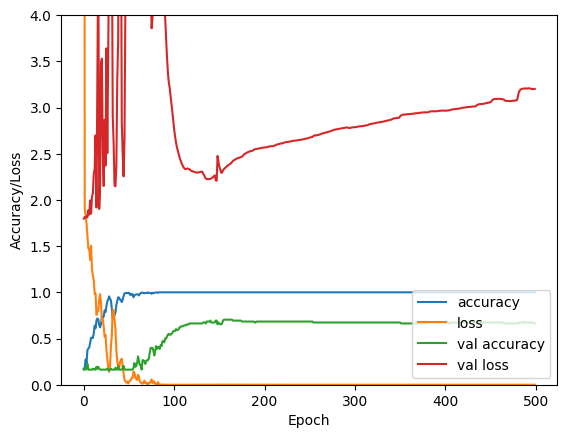

In [11]:
plot.plot(history.history['accuracy'], label='accuracy')
plot.plot(history.history['loss'], label = 'loss')
plot.plot(history.history['val_accuracy'], label='val accuracy')
plot.plot(history.history['val_loss'], label = 'val loss')
plot.xlabel('Epoch')
plot.ylabel('Accuracy/Loss')
plot.ylim([0, 4])
plot.legend(loc='lower right')

In [12]:
model.load_weights("./weights_1/weights-156-0.7041.hdf5")

predictions_1 = model.predict(test_img_1)

print(predictions_1)

index_predictions_1 = np.argmax(predictions_1, axis=1)

print(index_predictions_1)

7/7 [==============================] - 1s 67ms/step
[[7.7783272e-07 5.3676928e-07 3.0009317e-09 9.9163985e-01 4.6464507e-03
  3.7123670e-03]
 [4.9998148e-09 3.3003122e-08 7.4752010e-11 9.9982822e-01 2.2022150e-06
  1.6960126e-04]
 [4.2245296e-07 1.4247105e-08 1.1001390e-09 1.3295404e-07 9.9999738e-01
  2.0000048e-06]
 ...
 [9.1807613e-07 2.9449541e-08 1.4448873e-10 9.9994481e-01 5.4181011e-05
  2.7788741e-10]
 [6.2524385e-05 9.9865675e-01 1.2786450e-05 1.2122408e-03 4.9827773e-05
  5.9170170e-06]
 [1.6459404e-04 3.2115178e-03 3.0718910e-04 8.1628603e-01 1.7345339e-03
  1.7829612e-01]]
[3 3 4 4 5 5 0 0 5 5 2 2 3 3 3 3 3 3 3 3 3 3 3 4 0 4 2 2 0 4 4 4 2 2 4 2 2
 4 2 3 5 2 3 3 2 2 0 0 5 1 0 2 2 3 4 3 5 4 3 4 5 4 4 5 2 5 1 5 4 4 3 4 3 4
 4 4 4 4 4 5 5 4 5 5 2 2 5 2 2 4 5 5 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4
 5 5 2 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 5 5 4 3 4 4 4 5 4 4 4
 2 2 4 4 4 2 0 4 5 5 2 2 0 0 4 4 4 4 2 2 3 3 3 3 3 2 3 3 0 3 3 3 3 1 1 2 1
 5 5 5 5 5 4 4 0 5 5 5 2 5 3 3 3 

---
# Deuxieme Modele



In [13]:
import tensorflow.keras as keras

model2 = keras.models.Sequential()

# Couches "feature map"
# /!\ D'après le code ci dessus, l'input_shape est de : (48,48,1)
#Couche de convolution + BatchNormalization + Dropout à 0.2
model2.add(keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(48, 48, 1)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model2.add(keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())

#(24,24)
model2.add(keras.layers.MaxPooling2D((2, 2)))


#Couche de convolution + BatchNormalization + Dropout à 0.2
model2.add(keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model2.add(keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())

#(12x12)
model2.add(keras.layers.MaxPooling2D((2, 2)))


#Couche de convolution + BatchNormalization + Dropout à 0.2
model2.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model2.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())

#(6x6)
model2.add(keras.layers.MaxPooling2D((2, 2)))

#Couche de convolution + BatchNormalization + Dropout à 0.2
model2.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model2.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())

#(3x3)
model2.add(keras.layers.MaxPooling2D((2, 2)))

# Couche classification
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(4096, activation='relu'))
model2.add(keras.layers.Dense(4096, activation='relu'))
model2.add(keras.layers.Dense(1000, activation='relu'))
# /!\ D'après le code ci dessus, il y a 6 émotions à déchiffrer, donc l'output est :
model2.add(keras.layers.Dense(6, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)       

In [14]:
# Compiler le modèle
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="./weights_2/weights-{epoch:03d}-{val_accuracy:.4f}.hdf5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
callbacks = [checkpoint]

history=model2.fit(train_img_2, train_labels, epochs=500, batch_size=64, shuffle=False, validation_split=0.2, callbacks = callbacks)

Epoch 1/500
6/7 [========================>.....] - ETA: 0s - loss: 15.9287 - accuracy: 0.2057
Epoch 1: val_accuracy improved from -inf to 0.19388, saving model to ./weights_2/weights-001-0.1939.hdf5
7/7 [==============================] - 8s 419ms/step - loss: 15.7893 - accuracy: 0.2036 - val_loss: 1.7965 - val_accuracy: 0.1939
Epoch 2/500
6/7 [========================>.....] - ETA: 0s - loss: 1.8468 - accuracy: 0.2109
Epoch 2: val_accuracy did not improve from 0.19388
7/7 [==============================] - 1s 72ms/step - loss: 1.8485 - accuracy: 0.2113 - val_loss: 1.7992 - val_accuracy: 0.1633
Epoch 3/500
6/7 [========================>.....] - ETA: 0s - loss: 1.8497 - accuracy: 0.2474
Epoch 3: val_accuracy did not improve from 0.19388
7/7 [==============================] - 0s 63ms/step - loss: 1.8434 - accuracy: 0.2500 - val_loss: 1.8196 - val_accuracy: 0.1633
Epoch 4/500
6/7 [========================>.....] - ETA: 0s - loss: 1.7841 - accuracy: 0.2708
Epoch 4: val_accuracy did not impr

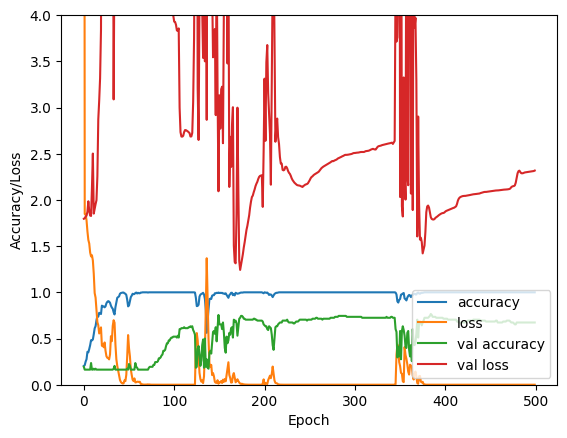

In [16]:
plot.plot(history.history['accuracy'], label='accuracy')
plot.plot(history.history['loss'], label = 'loss')
plot.plot(history.history['val_accuracy'], label='val accuracy')
plot.plot(history.history['val_loss'], label = 'val loss')
plot.xlabel('Epoch')
plot.ylabel('Accuracy/Loss')
plot.ylim([0, 4])
plot.legend(loc='lower right')

In [18]:
model2.load_weights("./weights_2/weights-385-0.7653.hdf5")

predictions_2 = model2.predict(test_img_2)

print(predictions_2)

index_predictions_2 = np.argmax(predictions_2, axis=1)

print(index_predictions_2)

7/7 [==============================] - 0s 9ms/step
[[1.16168092e-04 1.11188754e-04 3.46852685e-05 9.96158540e-01
  3.48867755e-03 9.07251306e-05]
 [3.09251391e-06 4.74280660e-06 1.38552323e-07 9.99980092e-01
  1.04390974e-05 1.46417142e-06]
 [3.79804362e-07 2.37315604e-07 2.45110618e-06 9.87861276e-05
  9.99894023e-01 4.02503292e-06]
 ...
 [4.79208893e-06 3.51837514e-07 6.63091058e-08 9.99646783e-01
  3.47574241e-04 4.02646094e-07]
 [9.67963874e-01 1.14192662e-03 5.15942884e-06 3.01462114e-02
  7.17296789e-04 2.55809919e-05]
 [4.37384588e-05 1.22137044e-05 7.04998726e-08 9.99940991e-01
  2.38292114e-06 6.48682601e-07]]
[3 3 4 4 5 3 4 3 3 5 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 1 2 0 4 5 5 2 2 5 2 2
 2 2 3 2 2 5 5 2 2 3 4 4 1 3 2 2 2 2 3 2 4 2 5 5 2 2 2 4 2 4 2 2 4 4 4 4 4
 4 4 4 2 4 4 2 4 2 4 2 2 4 4 2 4 4 4 2 2 4 2 1 2 2 2 2 2 2 2 4 4 2 2 2 2 2
 4 4 3 3 4 4 5 5 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 5 2 5 5 4 2 4 4 4 3 4 4 2
 2 3 3 3 3 2 0 0 5 5 2 2 2 4 4 2 4 4 2 2 3 3 3 4 4 2 5 3 1 1 5 5 5 2 2 2 

---
# Troisieme modele


In [19]:
import tensorflow.keras as keras

model3 = keras.models.Sequential()

# Couches "feature map"
# /!\ D'après le code ci dessus, l'input_shape est de : (48,48,1)
#Couche de convolution + BatchNormalization + Dropout à 0.2
model3.add(keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(48, 48, 1)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model3.add(keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())

#(24,24)
model3.add(keras.layers.MaxPooling2D((2, 2)))


#Couche de convolution + BatchNormalization + Dropout à 0.2
model3.add(keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model3.add(keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())

#(12x12)
model3.add(keras.layers.MaxPooling2D((2, 2)))


#Couche de convolution + BatchNormalization + Dropout à 0.2
model3.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model3.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())

#(6x6)
model3.add(keras.layers.MaxPooling2D((2, 2)))

#Couche de convolution + BatchNormalization + Dropout à 0.2
model3.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))

#Couche de convolution + BatchNormalization (pas de Dropout car la couche est juste avant un maxpooling)
model3.add(keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu'))
model3.add(keras.layers.BatchNormalization())

#(3x3)
model3.add(keras.layers.MaxPooling2D((2, 2)))

# Couche classification
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(4096, activation='relu'))
model3.add(keras.layers.Dense(4096, activation='relu'))
model3.add(keras.layers.Dense(1000, activation='relu'))
# /!\ D'après le code ci dessus, il y a 6 émotions à déchiffrer, donc l'output est :
model3.add(keras.layers.Dense(6, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_16 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_8 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_17 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 64)       

In [20]:
# Compiler le modèle
model3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="./weights_3/weights-{epoch:03d}-{val_accuracy:.4f}.hdf5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
callbacks = [checkpoint]

history=model3.fit(train_img_3, train_labels, epochs=500, batch_size=64, shuffle=False, validation_split=0.2, callbacks = callbacks)

Epoch 1/500
6/7 [========================>.....] - ETA: 0s - loss: 14.5925 - accuracy: 0.1953
Epoch 1: val_accuracy improved from -inf to 0.17347, saving model to ./weights_3/weights-001-0.1735.hdf5
7/7 [==============================] - 8s 369ms/step - loss: 14.4671 - accuracy: 0.1933 - val_loss: 1.7941 - val_accuracy: 0.1735
Epoch 2/500
6/7 [========================>.....] - ETA: 0s - loss: 1.8557 - accuracy: 0.1875
Epoch 2: val_accuracy did not improve from 0.17347
7/7 [==============================] - 0s 67ms/step - loss: 1.8571 - accuracy: 0.1881 - val_loss: 1.8185 - val_accuracy: 0.1735
Epoch 3/500
6/7 [========================>.....] - ETA: 0s - loss: 1.8638 - accuracy: 0.1979
Epoch 3: val_accuracy did not improve from 0.17347
7/7 [==============================] - 0s 62ms/step - loss: 1.8561 - accuracy: 0.2062 - val_loss: 1.8643 - val_accuracy: 0.1735
Epoch 4/500
6/7 [========================>.....] - ETA: 0s - loss: 1.7462 - accuracy: 0.2760
Epoch 4: val_accuracy did not impr

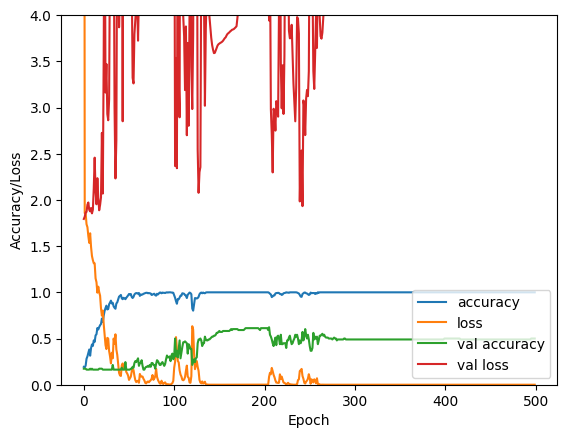

In [22]:
plot.plot(history.history['accuracy'], label='accuracy')
plot.plot(history.history['loss'], label = 'loss')
plot.plot(history.history['val_accuracy'], label='val accuracy')
plot.plot(history.history['val_loss'], label = 'val loss')
plot.xlabel('Epoch')
plot.ylabel('Accuracy/Loss')
plot.ylim([0, 4])
plot.legend(loc='lower right')

In [24]:
model3.load_weights("./weights_3/weights-206-0.6224.hdf5")

predictions_3 = model3.predict(test_img_3)

print(predictions_3)

index_predictions_3 = np.argmax(predictions_3, axis=1)

print(index_predictions_3)

7/7 [==============================] - 1s 12ms/step
[[1.07338444e-10 7.07824632e-10 9.93442741e-13 1.00000000e+00
  2.17079776e-08 7.42002848e-11]
 [2.12747198e-11 1.78541279e-10 9.21896226e-14 1.00000000e+00
  1.87069427e-09 1.97352482e-11]
 [4.00896388e-04 1.67620147e-03 7.69309641e-04 4.30362910e-01
  5.65729141e-01 1.06156641e-03]
 ...
 [3.34166549e-02 1.41664786e-04 2.38695037e-07 8.85494173e-01
  8.09462443e-02 1.02245190e-06]
 [9.99779522e-01 3.83558254e-05 1.98878780e-08 1.65865931e-04
  1.62129618e-05 6.38948894e-09]
 [7.35753495e-03 3.98219004e-03 3.18143284e-05 9.64129448e-01
  7.55319744e-03 1.69457309e-02]]
[3 3 4 3 5 3 4 3 5 5 2 2 3 3 3 3 3 0 3 3 3 3 3 4 4 4 2 5 4 4 2 5 2 2 5 2 2
 2 2 3 5 2 5 5 2 2 3 3 3 1 3 2 2 3 3 3 3 3 3 3 3 2 4 5 4 1 4 1 1 2 2 2 4 2
 4 4 4 2 4 5 5 4 4 4 2 2 4 2 2 3 4 4 2 2 4 2 4 4 2 2 2 4 2 5 5 2 2 2 2 2 2
 2 2 3 2 2 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 2 5 3 2 5 3 1 1 1 2 5 3 2 2 2
 2 3 4 4 4 3 0 0 3 5 2 2 2 2 2 2 0 5 2 2 3 3 3 4 4 2 3 0 0 0 3 5 2 2 2 2

---
# Mise en commun


In [25]:
final_predictions = []
for i in range(len(index_predictions_1)):
  if ( index_predictions_1[i] == index_predictions_2[i] ) :
    final_predictions.append(index_predictions_1[i])
  elif ( index_predictions_1[i] == index_predictions_3[i] ) :
    final_predictions.append(index_predictions_1[i])
  elif ( index_predictions_2[i] == index_predictions_3[i] ) :
    final_predictions.append(index_predictions_2[i])
  else :
    final_predictions.append(index_predictions_1[i])

print(len(final_predictions))

taux = 0

for i in range(len(final_predictions)):
  if final_predictions[i] == index_predictions_1[i]:
    taux += 1
taux = taux / len(final_predictions)
print(taux)

206
0.7524271844660194


---
# Mettre les résultats dans un fichier csv

In [26]:
import csv

data_to_write = [["Id","Expression"]]

for i in range(len(final_predictions)):
  data_to_write.append([i,final_predictions[i]])

print(data_to_write)

with open("/content/drive/MyDrive/COURS CI2/Challenge Data/Try_5packed.csv","w",newline='') as csvfile :
  csv_writer = csv.writer(csvfile)
  csv_writer.writerows(data_to_write)

[['Id', 'Expression'], [0, 3], [1, 3], [2, 4], [3, 4], [4, 5], [5, 3], [6, 4], [7, 3], [8, 5], [9, 5], [10, 2], [11, 2], [12, 3], [13, 3], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [19, 3], [20, 3], [21, 3], [22, 3], [23, 4], [24, 4], [25, 4], [26, 2], [27, 2], [28, 0], [29, 4], [30, 4], [31, 5], [32, 2], [33, 2], [34, 5], [35, 2], [36, 2], [37, 2], [38, 2], [39, 3], [40, 5], [41, 2], [42, 5], [43, 5], [44, 2], [45, 2], [46, 3], [47, 0], [48, 5], [49, 1], [50, 3], [51, 2], [52, 2], [53, 3], [54, 4], [55, 3], [56, 5], [57, 4], [58, 3], [59, 4], [60, 5], [61, 2], [62, 4], [63, 5], [64, 4], [65, 5], [66, 4], [67, 5], [68, 4], [69, 4], [70, 3], [71, 4], [72, 4], [73, 4], [74, 4], [75, 4], [76, 4], [77, 2], [78, 4], [79, 5], [80, 5], [81, 4], [82, 5], [83, 4], [84, 2], [85, 2], [86, 4], [87, 2], [88, 2], [89, 4], [90, 4], [91, 4], [92, 2], [93, 2], [94, 4], [95, 2], [96, 4], [97, 4], [98, 2], [99, 2], [100, 2], [101, 4], [102, 2], [103, 4], [104, 4], [105, 4], [106, 2], [107, 2], [108, 2